<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Harold Caballero; 201773602-k; malla</h3>
    <h3 align="center">Maximiliano Ojeda; 201773576-7; malla</h3>
    <h3 align="center">Septiembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b> <br> <br>
Es posible que las simulaciones en este laboratorio se tarden un poco más en ejecutarse, sin embargo, mantenga un tope de 5 minutos.
</font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 15 de octubre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. La paradoja del cumpleaños

La paradoja del cumpleaños es un problema matemático cuya respuesta es sorprendente dado el contexto del problema. En esta sección usted trabajará con este problema y podrá encontrar la respuesta que sorprendió a muchos. La paradoja es la siguiente: $N$ personas se reunen casualmente ¿Cuál es la probabilidad de que al menos 2 de ellas estén de cumpleaños el mismo día? **Considere año normal de 365 días.**

> a) Plantee la obtención de esta probabilidad en función de N. *Hint:* $\frac{Casos\;favorables}{Casos\;posibles}$


Se puede ver que la probabilidad de que al menos 2 personas compartan cumpleaños y que nadie lo haga son complementarias, 
así que la suma debe ser 1: p(c)+p(n)=1, donde c son los escenarios en que al menos 2 comparten cumpleaños y n es donde 
nadie comparte.

La probabilidad de que nadie comparta se puede extrapolar del siguiente proceso:

En un grupo de 2 personas, la probabilidad sería, 364/365, dado que si tomamos como pivote a la primera persona, la segunda 
tiene 364 días en los que cumplir años para no topar con el primero.

En un grupo de 3 personas, la segunda persona sigue teniendo 364 días para no coincidir con la primera, pero la tercera persona 
tiene 363 días para cumplir años sin topar con los 2 primeros y dado que son eventos independientes, las probabilidades se 
multiplican quedando (364*363)/365^2

Lo mismo para distintas cantidades de personas, por lo que para un N entre 2 y 365 queda:
P(n) = 365!/((365-N)!*365^N)

así que p(c) = 1 - p(n)



> b) Simule la paradoja del cumpleaños con varios $N \in [2,365]$ y obtenga la probabilidad empírica de encontrar dos personas con el mismo cumpleaños. Luego haga un gráfico de estas probabilidades en función de $N$ y la fórmula obtenida en a) y compare. 

*Tip: Como el orden de ejecución es $N\cdot Simulaciones$ no es necesario que vaya de 1 en 1 con los $N$ puede ir de 3 en 3, 5 en 5, etc.*

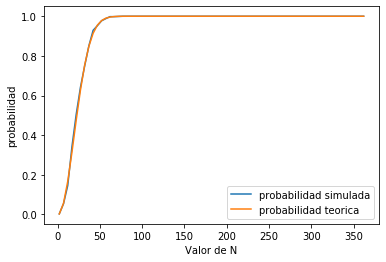

In [39]:
from matplotlib import pyplot as plt
from math import factorial as fact
from random import randint

x = list()
y = list()
for i in range(2, 365, 5):
    prob = 0
    for j in range(1000):
        contador = dict()
        for persona in range(i):
            cumple = randint(1, 365)
            if cumple in contador:
                prob += 1
                break
            else:
                contador[cumple] = 1
        
        del contador
    
    y.append(prob/1000)
    x.append(i)
    
plt.plot(x, y, label="probabilidad simulada")
plt.xlabel("Valor de N")
plt.ylabel("probabilidad")

f = fact(365)
p = lambda N: 1 - f/(fact(365-N)*(365**N))

"""P(c) =1 - 365!/((365-N)!*365^N)"""
y = [p(N) for N in range(2, 365, 5)]
x = list(range(2, 365, 5))    
plt.plot(x, y, label="probabilidad teorica")

plt.legend()
plt.show()

>c) Mediante simulación obtenga la cantidad de personas necesarias que debe asistir a la reunión para que la probabilidad de que al menos 2 personas estén de cumpleaños sea: 50%, 70% y 95%. Luego, para cada cantidad encontrada compare el valor de su probabilidad teórica mediante la fórmula que encontró en a). 

¿A qué se debe que al encontrar un valor empírico y evaluarlo en la fórmula de a) se observe un valor diferente que el encontrado? Si esto no le sucedió en su simulación, responda poniéndose en la siguiente situación:

- Su simulación le arrojó que 30 es el 50%
- F(30) es 0.45, claramente no llega al 50% (de ejemplo solamente)



¿A qué se debe ese error?

In [40]:
"""P(c) =1 - 365!/((365-N)!*365^N)"""

max_min50 = [0, 0]
min_max50 = [2, 0]

max_min70 = [0, 0]
min_max70 = [2, 0]

max_min95 = [0, 0]
min_max95 = [2, 0]



for i in range(10, 365, 1):
    prob = 0
    for j in range(1000):
        contador = dict()
        for persona in range(i):
            cumple = randint(1, 365)
            if cumple in contador:
                prob += 1
                break
            else:
                contador[cumple] = 1
        del contador
    prob /= 1000
    
    if(prob >= max_min50[0] and prob <= 0.5):
        max_min50[0] = prob
        max_min50[1] = i
    
    if(prob <= min_max50[0] and prob >= 0.5):
        min_max50[0] = prob
        min_max50[1] = i
    
    if(prob >= max_min70[0] and prob <= 0.7):
        max_min70[0] = prob
        max_min70[1] = i
    
    if(prob <= min_max70[0] and prob >= 0.7):
        min_max70[0] = prob
        min_max70[1] = i
    
    if(prob >= max_min95[0] and prob <= 0.95):
        max_min95[0] = prob
        max_min95[1] = i
    
    if(prob <= min_max95[0] and prob >= 0.95):
        min_max95[0] = prob
        min_max95[1] = i



"""
Se toman las cantidades de personas de las cotas minima y maxima para cada probabilidad y se evaluan en la función
"""
teorico50 = [round(p(max_min50[1]), 4), round(p(min_max50[1]), 4)]
teorico70 = [round(p(max_min70[1]), 4), round(p(min_max70[1]), 4)]
teorico95 = [round(p(max_min95[1]), 4), round(p(min_max95[1]), 4)]


#La cantidad de personas no siempre da menor en la cota baja que en la alta y pueden dar iguales
print("La probabilidad de 50% está entre", max_min50[1], "y", min_max50[1],
      "con", max_min50[0], "y", min_max50[0], "respectivamente")
print("Mientras que la probabilidad teorica está entre", teorico50[0], "y", teorico50[1], "respectivamente", end="\n\n")

print("La probabilidad de 75% está entre", max_min70[1], "y", min_max70[1],
      "con", max_min70[0], "y", min_max70[0], "respectivamente")
print("Mientras que la probabilidad teorica está entre", teorico70[0], "y", teorico70[1], "respectivamente", end="\n\n")

print("La probabilidad de 95% está entre", max_min95[1], "y", min_max95[1],
      "con", max_min95[0], "y", min_max95[0], "respectivamente")
print("Mientras que la probabilidad teorica está entre", teorico95[0], "y", teorico95[1], "respectivamente", end="\n\n")



La probabilidad de 50% está entre 22 y 23 con 0.479 y 0.507 respectivamente
Mientras que la probabilidad teorica está entre 0.4757 y 0.5073 respectivamente

La probabilidad de 75% está entre 31 y 30 con 0.691 y 0.709 respectivamente
Mientras que la probabilidad teorica está entre 0.7305 y 0.7063 respectivamente

La probabilidad de 95% está entre 46 y 47 con 0.947 y 0.961 respectivamente
Mientras que la probabilidad teorica está entre 0.9483 y 0.9548 respectivamente



Las variaciones se pueden deber a, primero, que la función que calcula la probabilidad en según la cantidad de personas
es una idealización de un modelo, por lo que al compararlo a situaciones reales, puede ser muy cercano, pero no exactamente
igual. Segundo la distribución de valores de la función randint(), puede no ser tan pareja como se espera.

>d) Si ahora nos interesa cuando 3, 4, 5 y 6 personas están de cumpleaños el mismo día. Realice un gráfico similar al del inciso b) pero esta vez con $P_{i}$ en función de $N$ donde $i \in [2,6]$ Concluya respecto al comportamiento de las gráficas.

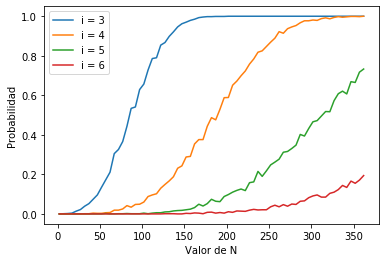

In [41]:
from random import randint
from matplotlib import pyplot as plt

t3 = [list(), list()]
t4 = [list(), list()]
t5 = [list(), list()]
t6 = [list(), list()]

for i in range(2, 365, 5):
    prob3 = 0
    prob4 = 0
    prob5 = 0
    prob6 = 0
    for j in range(1000):
        contador = dict()
        for persona in range(i):
            cumple = randint(1, 365)
            if cumple in contador:
                contador[cumple]+=1
            else:
                contador[cumple] = 1
                
        conj = contador.values()
        for elem in conj:
            if elem >=6:
                prob6 += 1
                prob5 += 1
                prob4 += 1
                prob3 += 1
                break
        else:
            if 5 in conj:
                prob5 +=1
                prob4 +=1
                prob3 +=1
            elif 4 in conj:
                prob4 +=1
                prob3 +=1
            elif 3 in conj:
                prob3 +=1
                
        del contador
        
    
    
    t3[0].append(prob3/1000), t3[1].append(i)
    t4[0].append(prob4/1000), t4[1].append(i)
    t5[0].append(prob5/1000), t5[1].append(i)
    t6[0].append(prob6/1000), t6[1].append(i)
    
plt.plot(t3[1], t3[0], label="i = 3")
plt.plot(t4[1], t4[0], label="i = 4")
plt.plot(t5[1], t5[0], label="i = 5")
plt.plot(t6[1], t6[0], label="i = 6")

plt.xlabel("Valor de N")
plt.ylabel("Probabilidad")

plt.legend()
plt.show()

>e) Debido a una falla espacio-temporal usted ha sido re-ubicado a otra dimensión donde los años tienen 1000 días. Necesita comprar algo para comer y no morir de hambre mientras los científicos de dicho universo lo intentan enviar de vuelta a casa. Usted ha decidido apostar con una persona con la base de la paradoja del cumpleaños. ¿Cuántas personas debería haber en la junta para tener al menos una certeza del 90% de que ganará la apuesta?

In [42]:
from random import randint

max_min90 = [0, 0]
min_max90 = [2, 0]

for i in range(2, 1000, 1):
    prob = 0
    for j in range(1000):
        contador = dict()
        for persona in range(i):
            cumple = randint(1, 1000)
            if cumple in contador:
                prob += 1
                break
            else:
                contador[cumple] = 1
        del contador
    prob /= 1000
    
    if(prob >= max_min90[0] and prob <= 0.9):
        max_min90[0] = prob
        max_min90[1] = i
    
    if(prob <= min_max90[0] and prob >= 0.9):
        min_max90[0] = prob
        min_max90[1] = i
        

print("La probabilidad de 90% está entre", max_min90[1], "y", min_max90[1],
      "con", max_min90[0], "y", min_max90[0], "respectivamente")
    

La probabilidad de 90% está entre 66 y 68 con 0.898 y 0.903 respectivamente


>f) ¿Cuál es la probilidad de que una persona tenga el mismo cumpleaños que usted? (365 días)

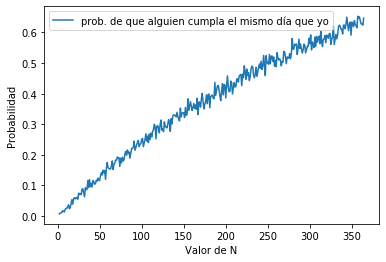

In [43]:
from random import randint

mi_cumple = randint(1, 365)
x = list()
y = list()

for i in range(2, 365, 1):
    prob = 0
    for j in range(1000):
        for persona in range(i):
            cumple = randint(1, 365)
            if cumple == mi_cumple:
                prob += 1
                break
    x.append(i)
    y.append(prob/1000)

plt.plot(x, y, label="prob. de que alguien cumpla el mismo día que yo")

plt.xlabel("Valor de N")
plt.ylabel("Probabilidad")

plt.legend()
plt.show()


## 2. Redes Complejas



El tema de Redes Complejas (grafos con muchos nodos) ha estado creciendo últimamente, sus orígenes se remontan a fines de los 90. Una de las propuestas para modelar la construcción de estas redes es la siguiente:

1. Se inicia con un solo nodo 
2. En cada iteración se agrega un nuevo nodo.
3. La probabilidad de unirse a un nodo viene dado por la siguiente expresión: $ P(Unirse\,al\,nodo_i) = \frac{Grado\,Nodo_i}{Grado\,Total\,Grafo}$ donde el Grado Total del Grafo corresponde a la suma de los grados de cada nodo perteneciente a este.
4. Se repite (2) y (3) varias veces hasta tener una red bastante grande.

A este tipo de red se les conoce como "Scale Free".

Un listado de links para refrescar conceptos: 

* [Grafo](https://es.wikipedia.org/wiki/Grafo)
* [Grado de un nodo](https://es.wikipedia.org/wiki/Grado_(teor%C3%ADa_de_grafos))


>a) Simule grafos de: 100, 1000 y 5000 nodos de la forma indicada y haga un scatterplot de Cantidad de Nodos v/s Grado del Nodo para los 3 grafos.

* Recuerde que las probabilidades se modifican después de agregar un nodo.
* Puede hacer una única iteración de 5000 pasos y guardar el estado de la red en 1000, 5000 y 10000.
* La matriz de adyacencia le facilitará el trabajo de obtener el grado de cada nodo (no es necesario hacerla, pero si tiene problemas encontrando alguna estructura de datos, esta le puede servir).

Matriz de Adyacencia:

Es una matriz cuadrada de $NxN$ donde en la posición $i,j$ hay un 1 si entre los nodos $i$ y $j$ hay una arista, de lo contrario esa entrada es 0. La diagonal en este casó será de 0 solamente.




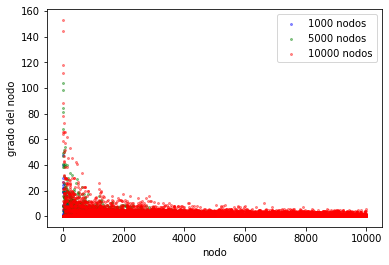

In [44]:
from random import randint
from matplotlib import pyplot as plt
#Se trabaja suponiendo que cada vez que llega un nodo nuevo, se evalua calculando la probabilidad para cada nodo
#existente de unirse con el nuevo, esto quiere decir que el nuevo se conceta con el existente y viceversa
#es decir, cada conexión será dirigida en ambas direcciones

    
def valores(grafo):
    grafo1 = list(grafo.items())
    grafo1.sort()
    x = list()
    y = list()
    for i, j in grafo1:
        x.append(i)
        y.append(len(j))
    return x, y
        
grafo = {0:[1], 1:[0]}
grado_total = 2

for nodo_nuevo in range(2, 1000):
    nuevos = []
    for nodo_actual in grafo:
        prob = randint(1, grado_total)
        if prob <= len(grafo[nodo_actual]):
            grafo[nodo_actual].append(nodo_nuevo)
            nuevos.append(nodo_actual)    
            grado_total += 2
    grafo[nodo_nuevo] = nuevos
grafo1x, grafo1y = valores(grafo)

#print(grafo1x, grafo1y)

for nodo_nuevo in range(1000, 5000):
    nuevos = []
    for nodo_actual in grafo:
        prob = randint(1, grado_total)
        if prob <= len(grafo[nodo_actual]):
            grafo[nodo_actual].append(nodo_nuevo)
            nuevos.append(nodo_actual)    
            grado_total += 2
    grafo[nodo_nuevo] = nuevos    
grafo2x, grafo2y = valores(grafo)



for nodo_nuevo in range(5000, 10000):
    nuevos = []
    for nodo_actual in grafo:
        prob = randint(1, grado_total)
        if prob <= len(grafo[nodo_actual]):
            grafo[nodo_actual].append(nodo_nuevo)
            nuevos.append(nodo_actual)    
            grado_total += 2
    grafo[nodo_nuevo] = nuevos
    
grafo3x, grafo3y = valores(grafo)

plt.scatter(grafo1x, grafo1y, alpha=0.4, s=4, c="blue", label="1000 nodos")
plt.scatter(grafo2x, grafo2y, alpha=0.4, s=4, c="green", label="5000 nodos")
plt.scatter(grafo3x, grafo3y, alpha=0.4, s=4, c="red", label="10000 nodos")

plt.xlabel("nodo")
plt.ylabel("grado del nodo")

plt.legend()
plt.show()


>b) Observando los gráficos realizados en a) ¿Qué puede decirse acerca de la distribución de grado?

Se puede observar que la distribución de grados tiende a ser homogenea entre los 3 grafos, los 3 decrecen rápidamente en la cantidad de conexiones a medida que se acercan a los nodos más tardíos.
Al rededor del nodo 1000, los grafos de 5000 y 10000 no tienen nodos con más de 25 conexiones y pasados del 2500, no hay nodos con más de 15 conexiones, por lo que puede decirse que el grado del nodo es inversamente proporcional a su orden de aparición.

>c) Si se quitan aristas con una probabilidad $\rho$ ¿Cómo cambia la distribución de grado del grafo de 10000 nodos? Genere gráficos de Cantidad de Nodos v/s Grado del Nodo para distintos valores de $\rho$ para ayudarle en su respuesta. ¿Sigue siendo de libre escala, pierde forma definida o se asemeja a otra distribución?


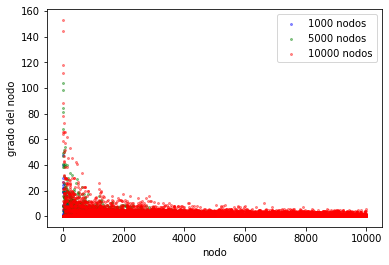

In [45]:
from copy import deepcopy
from random import uniform

grafo2 = deepcopy(grafo)
grafo3 = deepcopy(grafo)

def eliminar(grafo, prob):
    for nodo in grafo:
        if len(grafo[nodo]) > 0:
            por_borrar = list()
            for arista in grafo[nodo]:
                if uniform(0, 1) <= prob:
                    por_borrar.append(arista)
            for arista in por_borrar:
                grafo[nodo].remove(arista)

eliminar(grafo, 0.3)
eliminar(grafo2, 0.5)
eliminar(grafo3, 0.7)

graph1x, graph1y = valores(grafo)
graph1x, graph1y = valores(grafo2)
graph1x, graph1y = valores(grafo3)

plt.scatter(grafo1x, grafo1y, alpha=0.4, s=4, c="blue", label="1000 nodos")
plt.scatter(grafo2x, grafo2y, alpha=0.4, s=4, c="green", label="5000 nodos")
plt.scatter(grafo3x, grafo3y, alpha=0.4, s=4, c="red", label="10000 nodos")

plt.xlabel("nodo")
plt.ylabel("grado del nodo")

plt.legend()
plt.show()

                    

## 3. Artistas Musicales

En esta sección usted cuenta con dos datasets "albums.csv" y "artists.csv", el primero cuenta con información de álbums musicales lanzados por diversos artistas como el número de ventas, el estilo musical, puntajes según distintos críticos, etc. El segundo contiene datos sobre diversos artistas, como su nombre, puesto en la banda, pais de origen, etc. 

Para información más detallada de los datasets [aquí](https://www.kaggle.com/revilrosa/music-label-dataset#artists.csv)

>a) Cargue ambos dataset, cuente la cantidad de celdas nulas por columna en c/u y limpielas si cree necesario. 

>b) Responda las siguientes preguntas utilizando recursos visuales (tablas, gráficos). 

* Haga un top 10 de los mejores álbumes para cada crítico
* En función del puntaje promedio, ordene los géneros musicales de mejor ranking a peor.
* Top 5 de países con álbumes mejor calificados.
* Top 10 de artistas con más albumes publicados.
* ¿Qué generos predominan en los artistas Chilenos?
* Separando a los artistas en los que nacieron antes de 1980 y de 1980 en adelante. Si consideramos los años 2005, 2010, 2015 y 2019 ¿cómo han ido evolucionando los puntajes promedio de ambos grupos con el paso del tiempo? ¿Es posible evidenciar alguna tendencia?
* Haga una línea del tiempo donde en cada año se indique los 3 géneros con más álbumes publicados* ¿Se evidencia alguna tendencia? Haga la misma línea de tiempo para algún páis en específico de su elección y compare, si en algún año no hubo publicación deje la casilla marcada con "-".

Para la línea del tiempo se sugiere un formato como el siguiente: 

| 2000 | 2001 | 2002 | 2003 | 2004 |
|------|------|------|------|------|
| 1°   | 1°   | 1°   | 1°   | 1°   |
| 2°   | 2°   | 2°   | 2°   | 2°   |
| 3°   | 3°   | 3°   | -   | 3°   |

* ¿Hay alguna diferencia en los géneros que artistas Chilenos, Argentinos, Peruanos y Bolivianos publicaban?

>c) Utilizando el siguiente subconjunto de países: "United States", "Chile", "Japan", ¿es el país un buen predictor del puntaje promedio? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional y considere los intervalos del puntaje promedio en los percentiles: $[0,33],[34,66],[67,100]$. ¿Importa si se utiliza solo el subconjunto de datos o el dataset entero? 


**Bonus +10** El país como predictor del puntaje en cada crítico y viceversa.

>d) ¿Se puede decir que el género de un álbum es buen predictor del número de ventas? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional. 

Fije los intervalos de las ventas en los cuartiles 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)